In [36]:
%matplotlib inline
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import random
from numpy import linalg as LA

In [37]:
dfn = pd.read_csv("n2vecsent_init_rawclusterData_2.csv", header=None)
print(dfn.shape)

dfp = pd.read_csv("p2vsent_rawclusterData_2.csv", header=None)
print(dfp.shape)

df = pd.concat([dfn, dfp], axis=1)
print(df.shape)

df.columns = range(0,df.shape[1])

(7435, 602)
(7435, 602)
(7435, 1204)


In [42]:
df.reindex(np.random.permutation(df.index))
dfm = df

n_sample = 1000

rows = np.random.choice(dfm.index.values, n_sample)
df_ = dfm.ix[rows]

df_ = df_.sort_values(by=601)
df_.index = range(0, df_.shape[0])
print(df_.shape)

(1000, 1204)


In [43]:
df_.groupby(601).count()

,0,1,2,3,4,5,6,7,8,9,...,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203
601,,,,,,,,,,,,,,,,,,,,,
comp.graphics,397,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397
rec.sport.baseball,248,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248
talk.politics.guns,355,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355


In [44]:
nn = LA.norm(df_[df_.columns[1:601]], axis = 1)
pn = LA.norm(df_[df_.columns[603:1203]], axis = 1)

nm = np.zeros(shape=(df_.shape[0], df_.shape[0]))
pm = np.zeros(shape=(df_.shape[0], df_.shape[0]))

for i in df_.index:
    for j in df_.index:
        nm[i][j] = df_.ix[i][1:601].dot(df_.ix[j][1:601])/(nn[i]*nn[j])
        pm[i][j] = df_.ix[i][603:1203].dot(df_.ix[j][603:1203])/(pn[i]*pn[j])
        if nm[i][j] < 0:
            nm[i][j] = 0
        if pm[i][j] < 0:
            pm[i][j] = 0

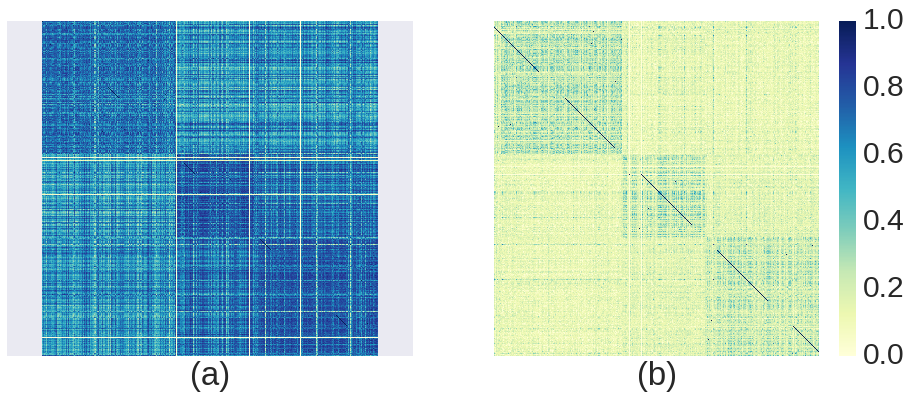

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.set(font_scale=3)
plt.rcParams['figure.figsize']=(16,6)
sns.heatmap(pm, cmap="YlGnBu", xticklabels=False, yticklabels=False, ax=ax1, square=True, cbar = None)
sns.heatmap(nm, cmap="YlGnBu", xticklabels=False, yticklabels=False, ax=ax2, square=True)
ax1.set(xlabel="(a)")
ax2.set(xlabel="(b)")